In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,NaN,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,NaN
2,-1.115400,0.217560,1.61050,1.33710,NaN,NaN,3.99630,2.21730,3.90290,NaN,2.43890,NaN
3,-0.539160,NaN,NaN,0.33278,0.19027,NaN,1.66010,2.35270,0.66126,NaN,NaN,3.734600
4,-0.268400,NaN,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,NaN,0.46504,2.851400
396,NaN,NaN,3.90540,1.33770,1.41870,1.68610,NaN,3.79360,NaN,0.54249,NaN,NaN
397,-3.479100,NaN,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,NaN,0.95496,1.52630,2.123800
398,NaN,NaN,2.49480,0.39655,NaN,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	92
float64		column 2	118
float64		column 3	53
float64		column 4	26
float64		column 5	92
float64		column 6	91
float64		column 7	105
float64		column 8	79
float64		column 9	65
float64		column 10	65
float64		column 11	39
float64		column 12	117


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,308.000000,282.000000,347.000000,374.000000,308.000000,309.000000,295.000000,321.000000,335.000000,335.000000,361.000000,283.000000
mean,-0.148519,-0.006769,2.045446,1.904409,1.899112,2.002652,2.101575,1.966039,1.938113,1.991073,1.954391,1.984283
std,2.208382,2.298020,1.092172,1.132981,1.063790,1.047117,1.075777,1.075941,1.105282,1.112100,1.132846,1.134604
min,-6.673100,-6.800500,0.005583,0.005376,0.042682,0.064411,0.003618,0.013093,0.007019,0.067105,0.006786,0.001972
25%,-0.574538,-0.628645,1.148700,0.958747,1.048775,1.224500,1.224450,1.143800,1.082750,1.050850,0.966100,1.128050
50%,-0.106780,0.030257,2.084100,1.792600,1.875900,2.020800,2.142500,1.925100,1.970900,2.032900,1.907100,1.926100
75%,0.526393,0.646915,2.899850,2.799175,2.752050,2.773300,2.914300,2.783900,2.816300,2.965850,2.926100,2.953800
max,8.409300,6.777100,3.976400,3.993400,3.966100,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

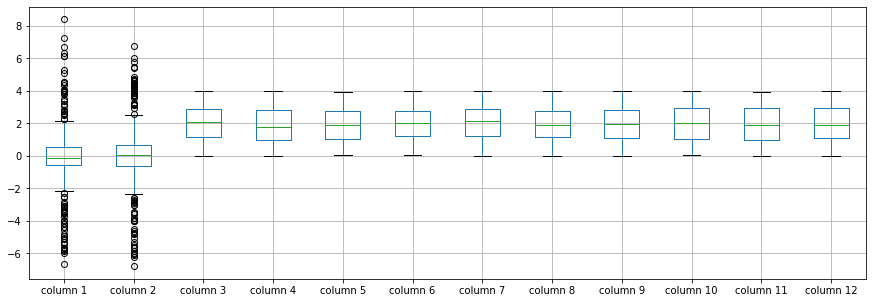

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.148519
column 2    -0.006769
column 3     2.045446
column 4     1.904409
column 5     1.899112
column 6     2.002652
column 7     2.101575
column 8     1.966039
column 9     1.938113
column 10    1.991073
column 11    1.954391
column 12    1.984283
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.005048,-0.012699,-0.085285,-0.008509,-0.022374,-0.062693,-0.022490,-0.024063,0.048770,0.048811,-0.037075
column 2,-0.005048,1.000000,-0.138802,-0.067808,0.031279,-0.006275,-0.015730,0.065512,-0.054846,-0.080189,-0.035991,-0.030082
column 3,-0.012699,-0.138802,1.000000,0.006356,-0.012505,0.006312,-0.119792,0.080205,0.143413,0.015755,-0.070346,-0.008161
column 4,-0.085285,-0.067808,0.006356,1.000000,0.051560,0.090008,0.045055,0.147961,-0.038396,0.049313,-0.048874,-0.028074
column 5,-0.008509,0.031279,-0.012505,0.051560,1.000000,0.067246,0.110062,0.136051,0.034550,-0.011797,0.020219,-0.098028
column 6,-0.022374,-0.006275,0.006312,0.090008,0.067246,1.000000,0.008345,0.017897,0.060541,-0.056238,0.009727,0.028779
column 7,-0.062693,-0.015730,-0.119792,0.045055,0.110062,0.008345,1.000000,0.015507,0.058403,0.035676,0.068171,-0.015601
column 8,-0.022490,0.065512,0.080205,0.147961,0.136051,0.017897,0.015507,1.000000,0.058493,-0.171992,-0.092209,-0.038079
column 9,-0.024063,-0.054846,0.143413,-0.038396,0.034550,0.060541,0.058403,0.058493,1.000000,0.024476,0.047153,-0.002765
column 10,0.048770,-0.080189,0.015755,0.049313,-0.011797,-0.056238,0.035676,-0.171992,0.024476,1.000000,-0.007763,0.027317


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+34,12+34+34,12+34+34+34,12+34+34+34+34,12+34+34+34+34+34,12+34+34+34+34+34+34,12+34+34+34+34+34+34+34,12+34+34+34+34+34+34,12+34+34+34+34+34,12+34+34+34+34,12+34+34+34,12+34+34,12+34,12], vae_layer = False, seed = 34)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 21.493049697875975
Epoch: 1 , loss: 21.44381805419922
Epoch: 2 , loss: 21.410928955078123
Epoch: 3 , loss: 21.29823127746582
Epoch: 4 , loss: 21.155601806640625
Epoch: 5 , loss: 19.999738693237305
Epoch: 6 , loss: 18.349846267700194
Epoch: 7 , loss: 17.8258296585083
Epoch: 8 , loss: 17.754165267944337
Epoch: 9 , loss: 17.32110954284668
Epoch: 10 , loss: 17.069731674194337
Epoch: 11 , loss: 16.77976566314697
Epoch: 12 , loss: 16.438544692993165
Epoch: 13 , loss: 16.40026824951172
Epoch: 14 , loss: 15.866094093322754
Epoch: 15 , loss: 15.625843887329102
Epoch: 16 , loss: 15.741170616149903
Epoch: 17 , loss: 15.675818481445312
Epoch: 18 , loss: 15.33926601409912
Epoch: 19 , loss: 15.421463317871094
Epoch: 20 , loss: 15.074197769165039
Epoch: 21 , loss: 15.052518692016601
Epoch: 22 , loss: 14.976391830444335
Epoch: 23 , loss: 14.585269508361817
Epoch: 24 , loss: 14.978439407348633
Epoch: 25 , loss: 14.7975

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.215364,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,-3.337269
2,0.000000,0.000000,0.000000,0.0,-2.327889,0.320659,0.00000,0.0,0.000000,-0.070217,0.000000,0.864985
3,0.000000,0.051980,0.296863,0.0,0.000000,0.063316,0.00000,0.0,0.000000,-2.469972,-3.303834,0.000000
4,0.000000,0.983682,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.598598
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.712065,0.000000,0.000000
396,-0.334181,6.059497,0.000000,0.0,0.000000,0.000000,0.01483,0.0,0.968403,0.000000,-2.250587,-2.662697
397,0.000000,1.994898,0.000000,0.0,0.000000,0.000000,0.00000,0.0,-3.321022,0.000000,0.000000,0.000000
398,-7.361055,0.355669,0.000000,0.0,-2.057970,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(67.78168084094561, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.41513948899447073

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     2.711268
column 4     1.187200
column 5     3.956600
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    3.604400
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.101484,0.042485,1.978900,1.83630,2.886600,2.469600,0.21541,3.09000,0.783430,0.510350,0.030430,0.100660
1,0.029389,0.206580,0.488610,1.43430,3.129900,1.277800,1.42850,0.14333,1.194800,2.131800,0.984730,0.507231
2,-1.115400,0.217560,1.610500,1.33710,1.440311,1.530659,3.99630,2.21730,3.902900,1.444183,2.438900,1.498565
3,-0.539160,-0.009894,0.661723,0.33278,0.190270,0.630476,1.66010,2.35270,0.661260,0.665128,0.634266,3.734600
4,-0.268400,-0.022318,2.882200,1.56160,3.201400,3.377400,1.52260,0.98475,3.109400,3.656400,3.917200,1.545658
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.70480,0.882690,0.354060,1.62780,3.29400,1.085000,0.869465,0.465040,2.851400
396,-0.069551,-0.048103,3.905400,1.33770,1.418700,1.686100,1.10993,3.79360,1.096303,0.542490,1.115213,1.092903
397,-3.479100,0.001598,1.324800,1.77210,2.550900,1.470100,0.92540,1.84110,0.156278,0.954960,1.526300,2.123800
398,-0.068055,-0.055801,2.494800,0.39655,0.941030,3.410100,2.95160,0.27800,0.990590,3.437400,1.816200,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NL_20(imp).xlsx", index=False, header=False)